# Прикладная статистика. ДЗ 2.
# Академия Аналитиков Авито

__Правила:__
- Жесткий дедлайн: **2022-12-31 23:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW2-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (1 балл)

### На зачет

Пусть $x_1, ... x_N$ — реализация выборки $\xi_1, ... \xi_N \sim \mathcal{N}(\mu,\sigma)$. Мы хотим проверить гипотезу:
- $H_0: \mu = \mu_0$
- $H_1: \mu \neq \mu_0$

Реализовать критерий Стьюдента — функцию `simple_my_t_test(sample, mu_0, alpha)`. Функция должна вернуть `SimpleMyTtestResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue

Какие библиотеки можно использовать:

```
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t
```

In [1]:
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t

**Важно:** что ее решение надо объяснить! Можно не вдаваться в детали, но ваш алгоритм надо описать текстом.

In [2]:
# Автопроверка

MySimpleTtestResults = namedtuple('MySimpleTtestResults', 
                                  ['is_rejected', 'pvalue'])

def my_simple_t_test(sample: list, mu_0: float, alpha: float = 0.05) -> namedtuple :
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MySimpleTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """
    is_rejected = None
    pvalue = None
    n = len(sample)
    T = np.sqrt(n)*(np.mean(sample) - mu_0)/np.std(sample, ddof = 1)
    pvalue = 2*(1 - t.cdf(np.abs(T), df = n - 1))
    is_rejected = (pvalue <= alpha)
    
    return MySimpleTtestResults(is_rejected, pvalue)


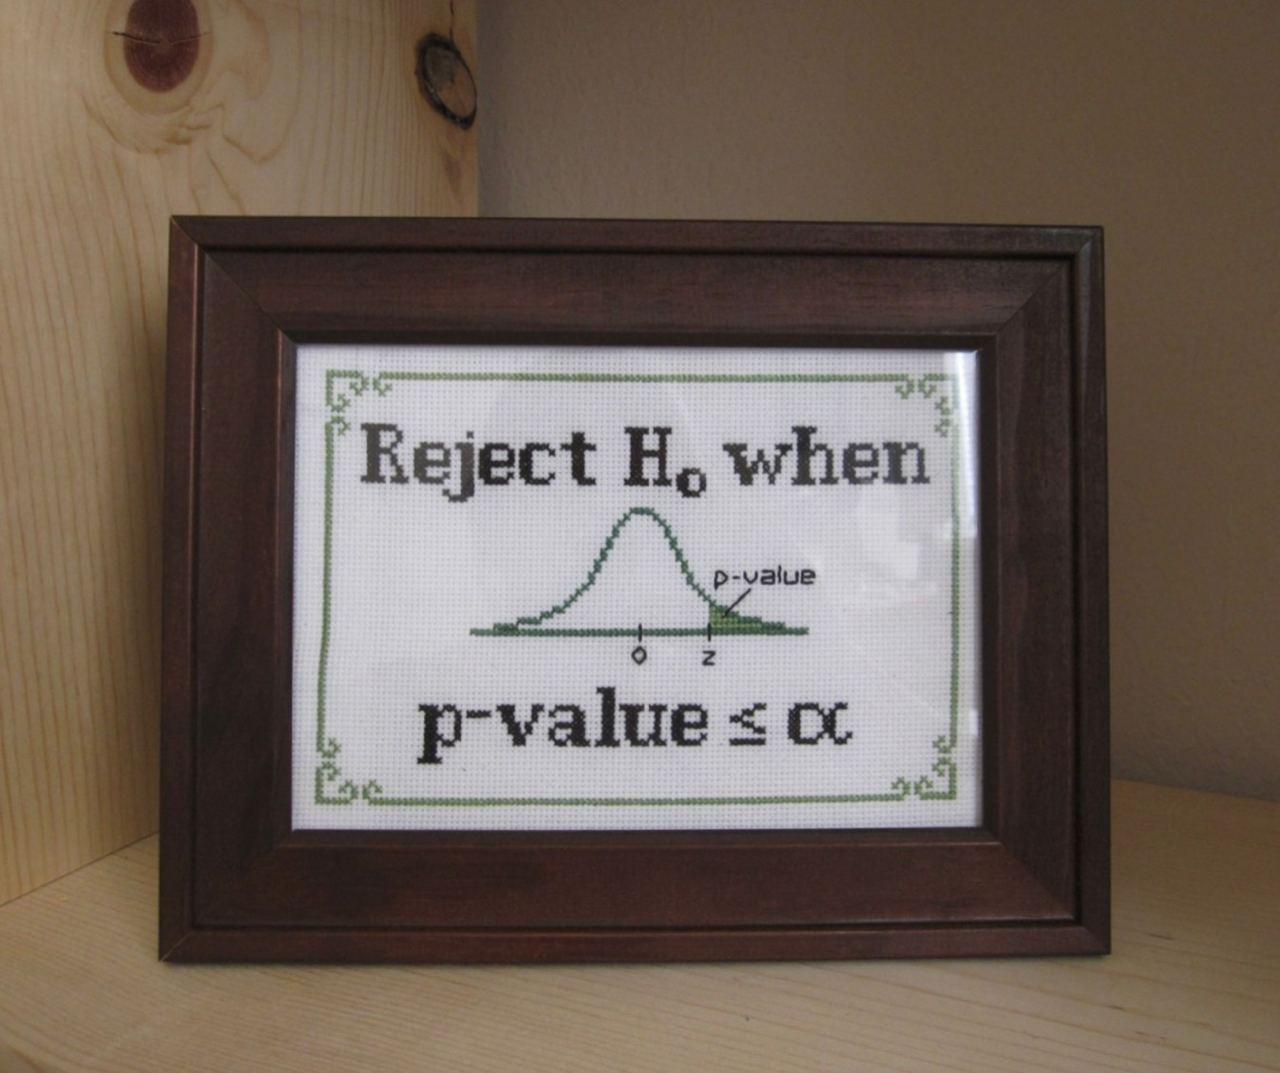

Считаю статистику Стьюдента по формуле $T(X) := \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{S^2}} $. При справедоивости нулевой гипотезы она имеет распределение Стьюдента с $n - 1$ степенью свободы. Тогда pvalue, как вероятность получения такого или более экстремального значения в двухсторонней альтернативе можно найти по формуле
$2\cdot(1 - F(|t|))$ (рассматривается два случая, когда статистика больше и меньше нуля, объединяя их получаем такую формулу с модулем. Двайка появляется в следствие симметрии распределения Стьюдента.) Отвергаем нулевую гипотезу, если pvalue меньше или равно $\alpha$.



In [3]:
# посчитаю FPR, чтобы убедиться что он в районе 5%
from scipy.stats import norm, expon
counter = 0
exp_number = 1000
for _ in range(exp_number):
    sample = norm.rvs(size = 1000)
    counter += my_simple_t_test(sample, mu_0 = 0)[0]

FPR = counter/exp_number
print(FPR)

    

0.063


## Задача 2 (4 балла)

Решить прошлую задачу без использования распределения Стьюдента,
**пользуясь следующими библиотеками**

```
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos
``` 

In [4]:
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand # равномерное распределение на [0,1)
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos

In [5]:
from scipy.special import betainc, beta
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t
from collections import namedtuple

Некоторые полезные формулы

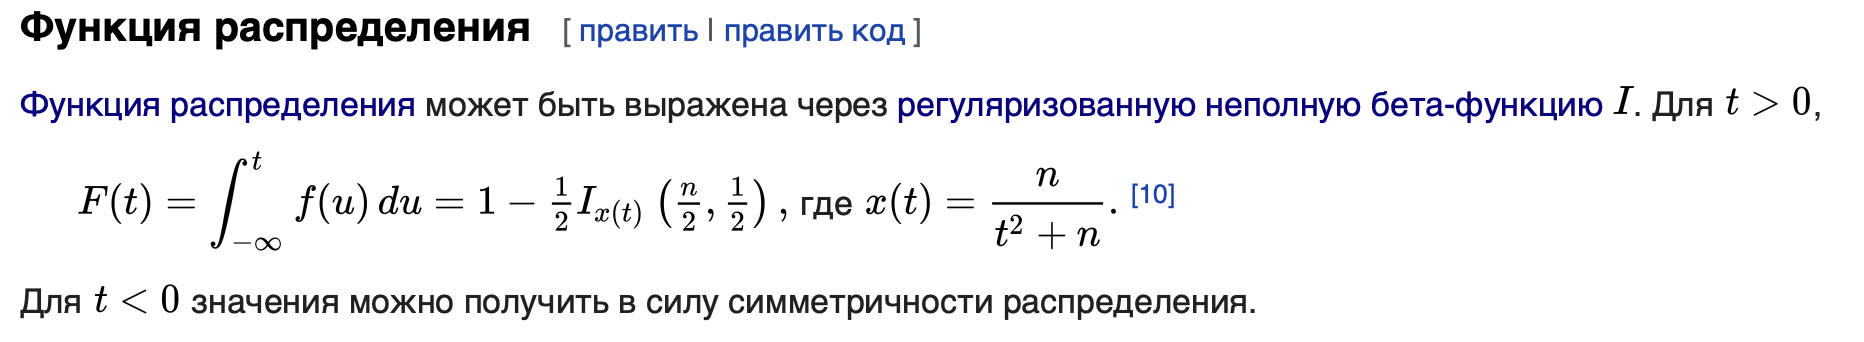


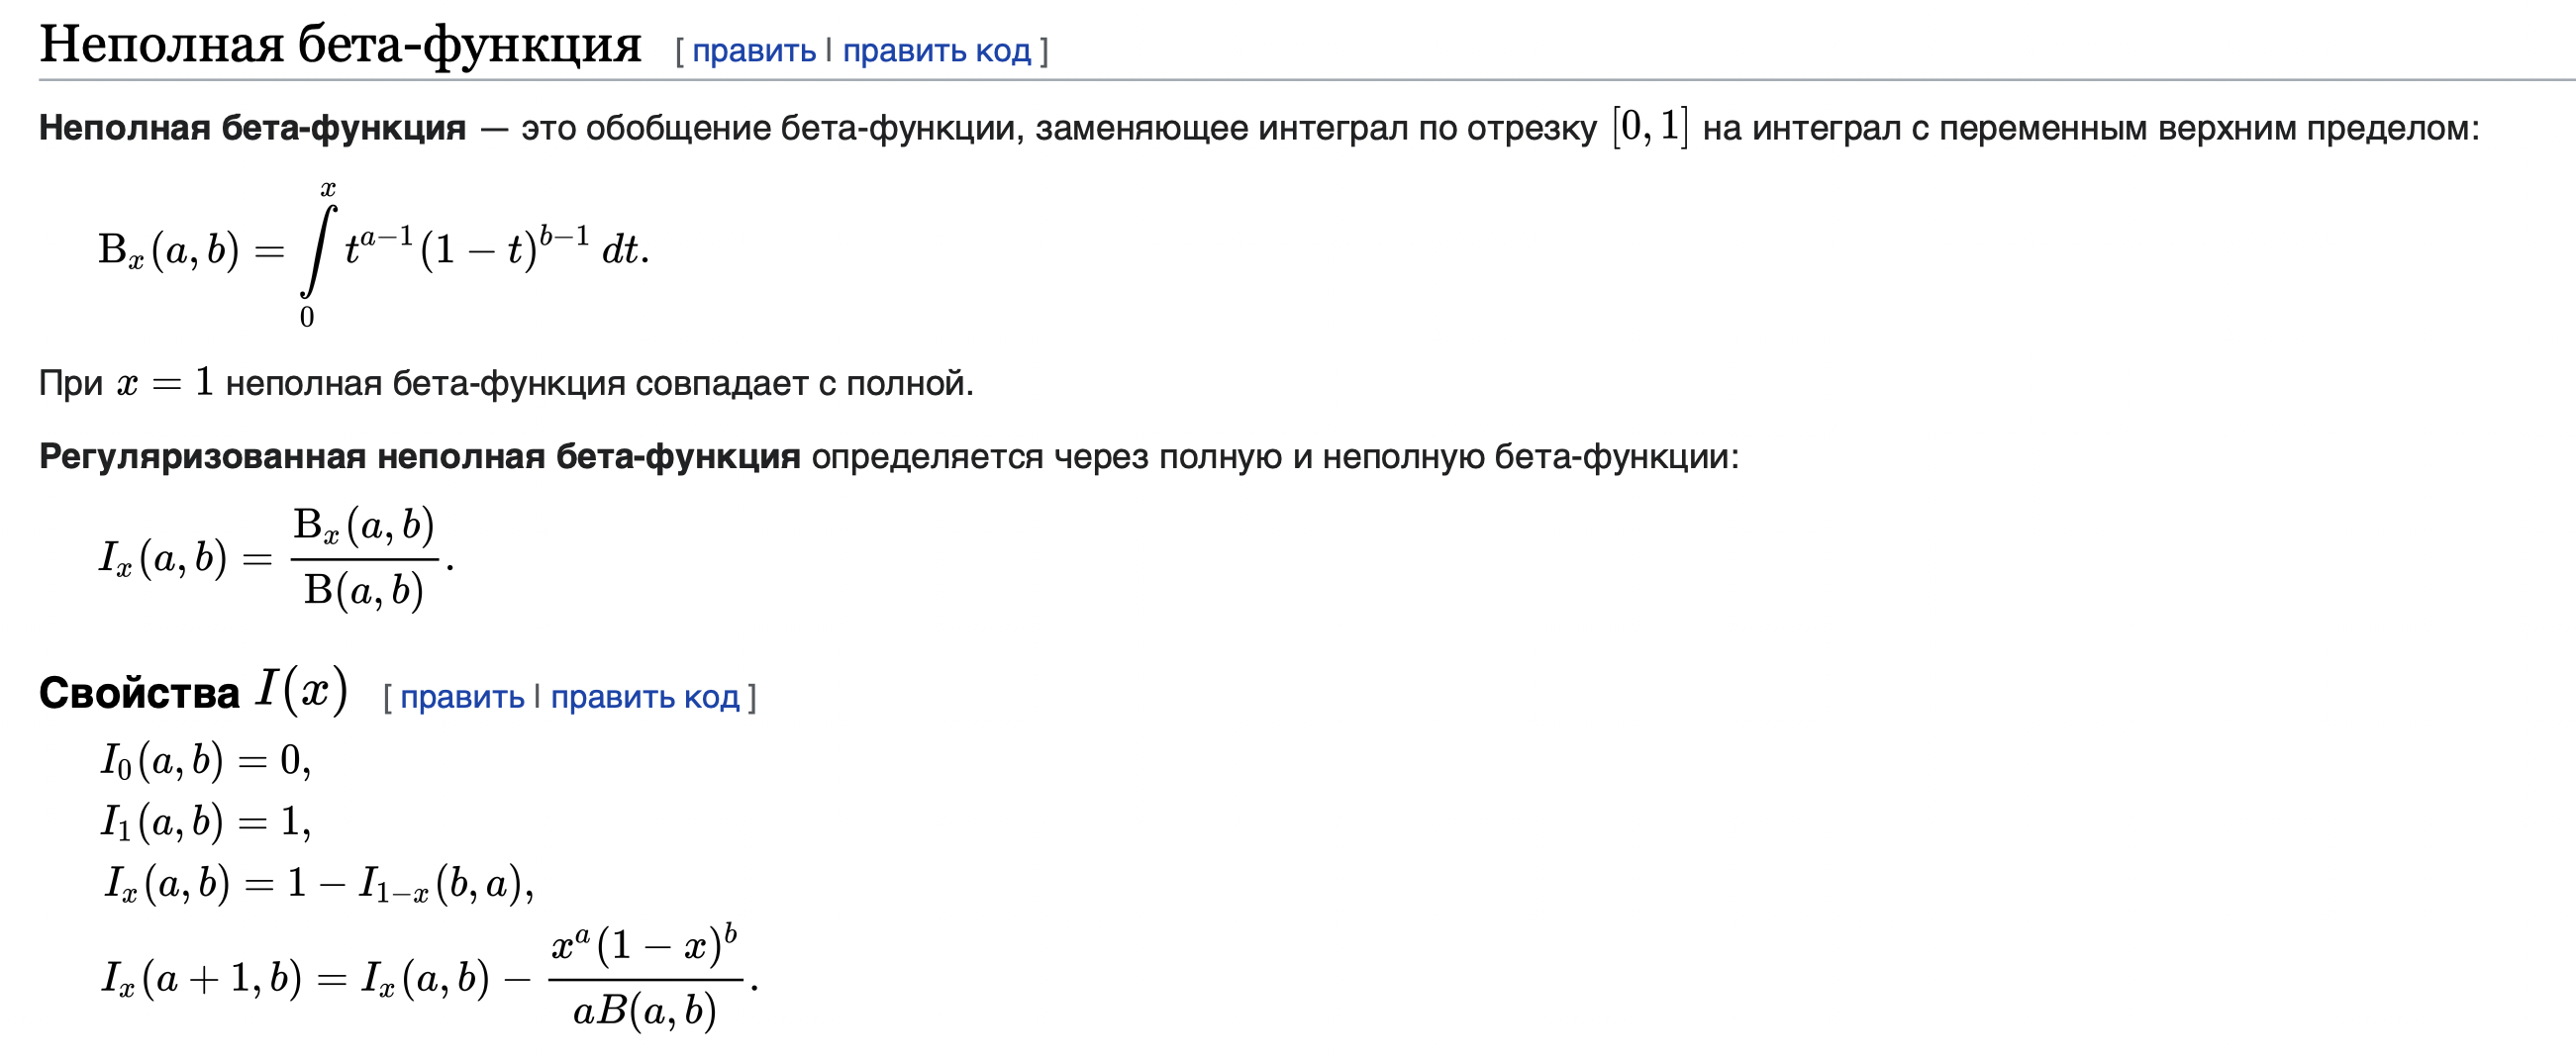

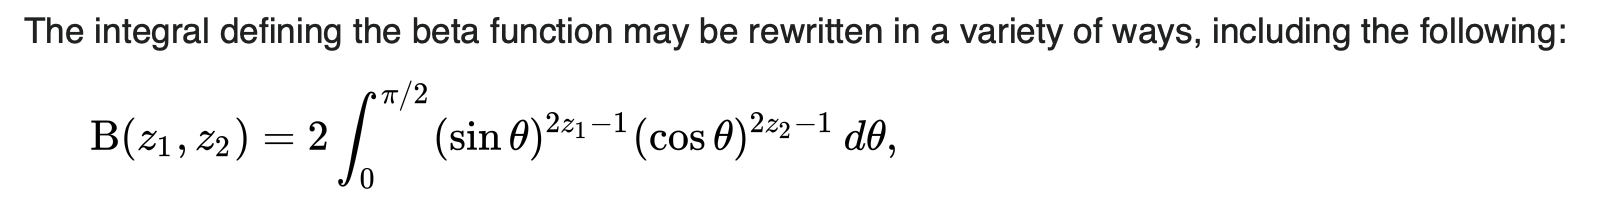

Причем из последней формулы получается выражение для неполной бета функции, 
если верхний предел заменить на $\arcsin{\sqrt{x}}$

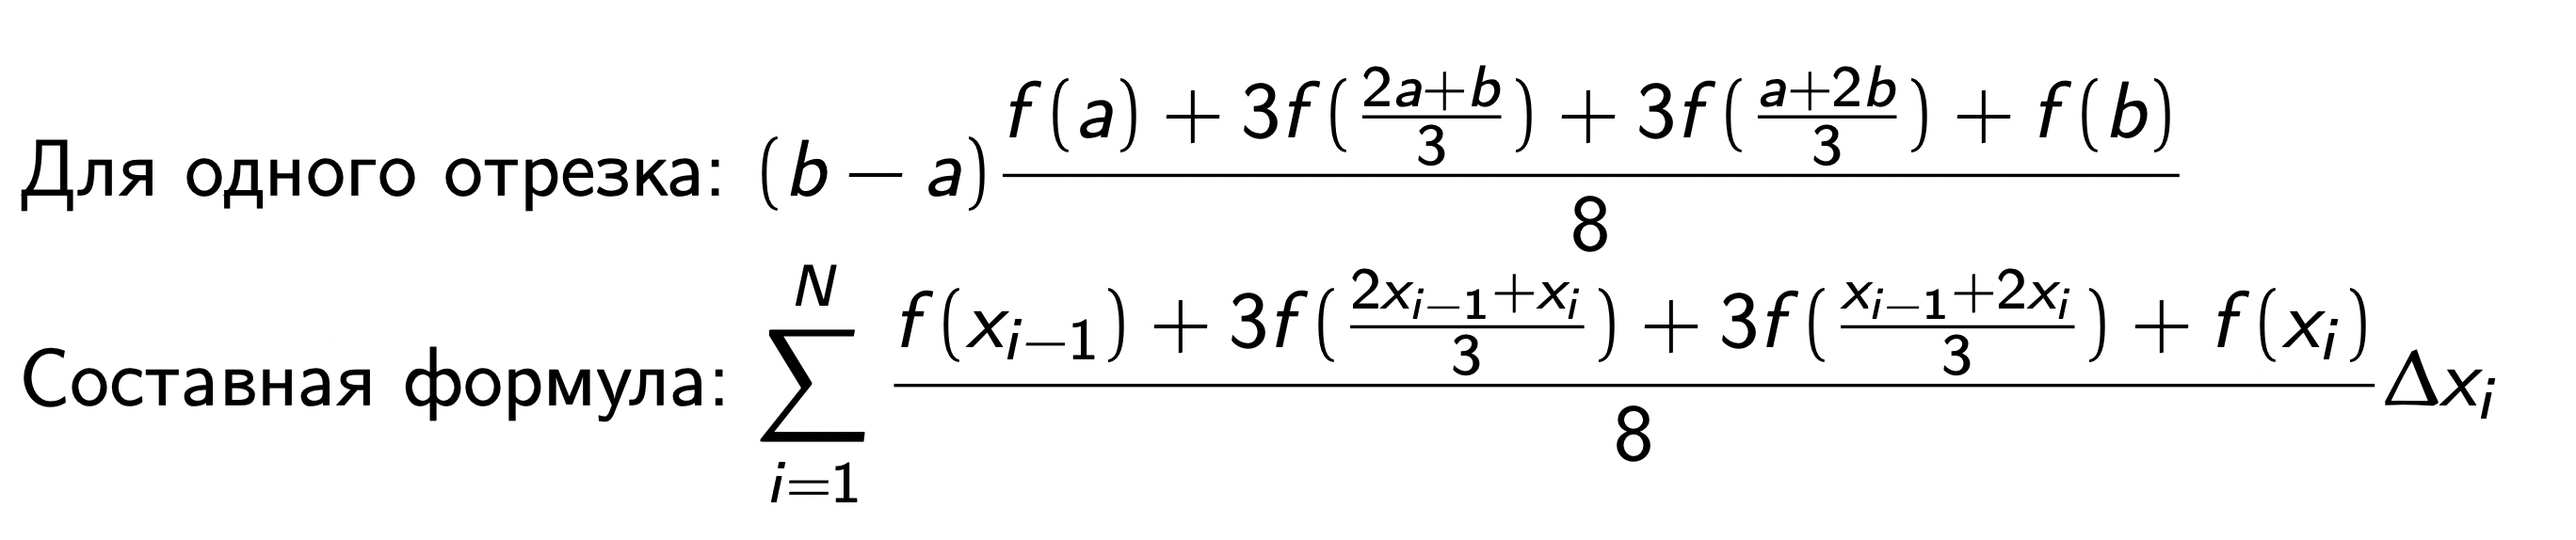

#### Арксинус

Сперва напишу функцию для вычисления арксинуса.

In [6]:
def my_arcsin(x, epsilon = 1/1_000_000, step = 1):
    '''
    Вычисляет arcsin(x) методом Ньютона. 
    При разнице меньше чем epsilon между итерациями,
    метод заканчивает работу.
    '''
    if x == 1.:
        return pi/2
    
    theta_0 = pi/4
    theta_prev = theta_0
    flg_continue = True
    i = 0
    while flg_continue:
        theta_next = theta_prev - step*(sin(theta_prev) - x)/max(cos(theta_prev), 1/1_000)
        flg_continue = not (theta_prev - epsilon < theta_next 
                        and  theta_next < theta_prev + epsilon)
        i += 1
        theta_prev = theta_next
    
    return theta_next


Посмотрим на точность вычисления

In [7]:
my_arcsin(0.9)
x_array = np.linspace(0, 1, 1000)
my_array = np.array([my_arcsin(x) for x in x_array])
their_array = np.arcsin(x_array)

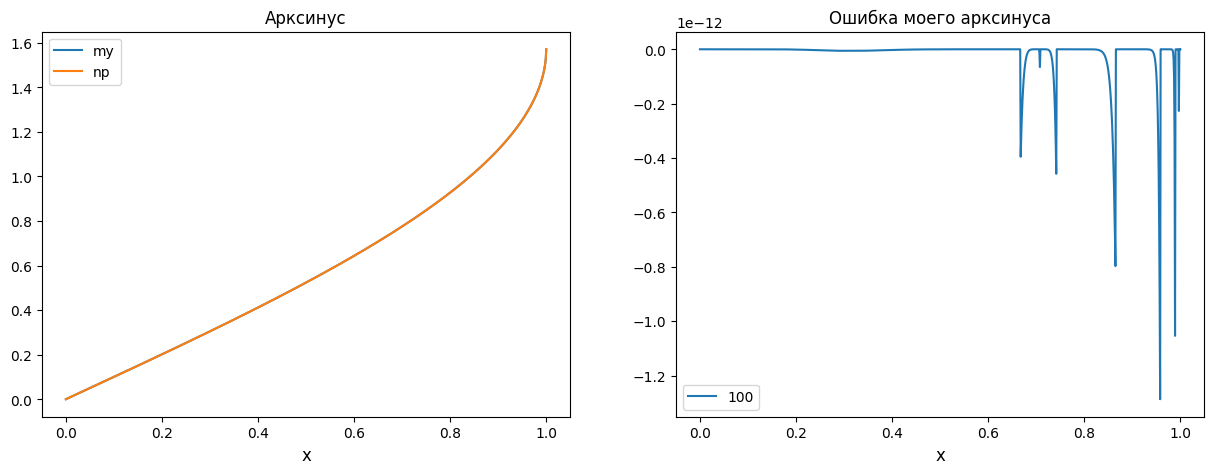

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_array, my_array, label = 'my')
axs[0].plot(x_array, their_array, label = 'np')


axs[0].set_xlabel('x', fontsize=12)
axs[0].set_title('Арксинус', fontsize=12)

axs[1].plot(x_array, my_array - their_array, label = '100')

axs[1].set_xlabel('x', fontsize=12)
axs[1].set_title('Ошибка моего арксинуса', fontsize=12)

axs[0].legend()
axs[1].legend()


### Вычисление бета-функции

Тут я пишу некоторые функции для численного интегрирования бета функции, через которую затем вычисляю функцию распределения Стьюдента. Затем смотрю на ошибки бета функции и функции распределения

In [9]:
def x_foo(t, n):
    '''
    Возвращает верхний предел интегрирования неполной бета функции.
    '''
    return n/(t**2 + n)


def beta_x_derivative(t, a, b):
    '''
    Подинтегральная функция для вычисления неполной бета функции с параметрами a, b.
    '''
    return t**(a - 1)*(1 - t)**(b - 1)

def beta_x_derivative_sin(t, n):
    '''
    Возвращает значение подинтегральной неполной бета функции с параметрами (n/2, 1/2)
    '''
    return 2*((np.sin(t))**(n-1))

def my_i_x_through_sample_sin(x, n, num = 100):
    '''
    Вычисляет неполную бета-функцию с параметрами x, n/2, 1/2.
    Параметр num определяет кол-во точек для численного интегрирования.
    Интегрирование ведется 
    '''
    parameters = {'n': n}
    x = my_arcsin(x**0.5)
    ordered_sample = my_linspace(0, x, num)
    nom = three_eqight_integration(beta_x_derivative_sin, ordered_sample, **parameters)
    uniform_sample = my_linspace(0, np.pi/2, num)
    denom = three_eqight_integration(beta_x_derivative_sin, uniform_sample, **parameters)
    return nom/denom

def my_linspace(start, stop, num):
    '''
    Возвращает равномерную сетку на отрезке [start, stop).
    Аналог np.linspace  с endpoint = False.
    '''
    step = (stop - start)/num
    result = []
    added_point = start
    for i in range(num):
        result.append(added_point)
        added_point += step
    return result

def three_eqight_interval_appr(foo, prev_x, next_x, **kwargs):
    '''
    Аппроксимирует функцию на отрезке [prev_x, next_x] методом 3/8
    '''
    delta = next_x - prev_x
    return (foo(prev_x, **kwargs) + 3*foo((2*prev_x + next_x)/3, **kwargs) 
            + 3*foo((prev_x + 2*next_x)/3, **kwargs) + foo(next_x, **kwargs))/8*delta

def three_eqight_integration(foo, ordered_sample, **kwargs):
    '''
    Вычисляет интеграл функции foo на упорядоченном массиве ordered_sample
    '''
    N = len(ordered_sample)
    i = 1
    result = 0
    while i < N:
        next_x = ordered_sample[i]
        prev_x = ordered_sample[i-1]
        result += three_eqight_interval_appr(foo, prev_x, next_x, **kwargs)
        i += 1
        
    return result

# def my_i_x_through_sample(x, a, b, num = 100):
#     '''
#     Вычисляет неполную бета-функцию с параметрами x, a, b.
#     Параметр num определяет кол-во точек для численного интегрирования
#     '''
#     parameters = {'a': a, 'b': b}
#     ordered_sample = my_linspace(0, x, num)
#     nom = three_eqight_integration(beta_x_derivative, ordered_sample, **parameters)
#     uniform_sample = my_linspace(0, 1, num)
#     denom = three_eqight_integration(beta_x_derivative, uniform_sample, **parameters)
#     return nom/denom
        
# def my_t_cdf(t, n, num = 100):
#     x = x_foo(t, n)
#     a = n/2
#     b = 1/2
#     if t >= 0:
#         return 1 - my_i_x_through_sample(x, a, b, num)/2
#     else:
#         return my_i_x_through_sample(x, a, b, num)/2
    
def my_t_cdf_sin(t, n, num = 100):
    x = x_foo(t, n)
    i_x = my_i_x_through_sample_sin(x, n, num)
    if t >= 0:
        return 1 - i_x/2
    else:
        return i_x/2
    

Далее посмотрим как хорошо мои функции вычисляет бета функцию. Построю вычисляемые неполные бета функции для разных размеров сетки и сравню с бета-функцией из scipy.

### Тестирую интегрирование через синус

In [10]:
n = 10
x_array = np.linspace(0, 1, 100)
my_result_100 = []
my_result_10000 = []
my_result_100000 = []
scipy_result = []

for x in (x_array):
#     my_result_100.append(my_i_x_through_sample_sin(x, n, num = 100))
    my_result_10000.append(my_i_x_through_sample_sin(x, n, num = 10000))
    my_result_100000.append(my_i_x_through_sample_sin(x, n, num = 100000))
    scipy_result.append(betainc(n/2, 1/2, x))



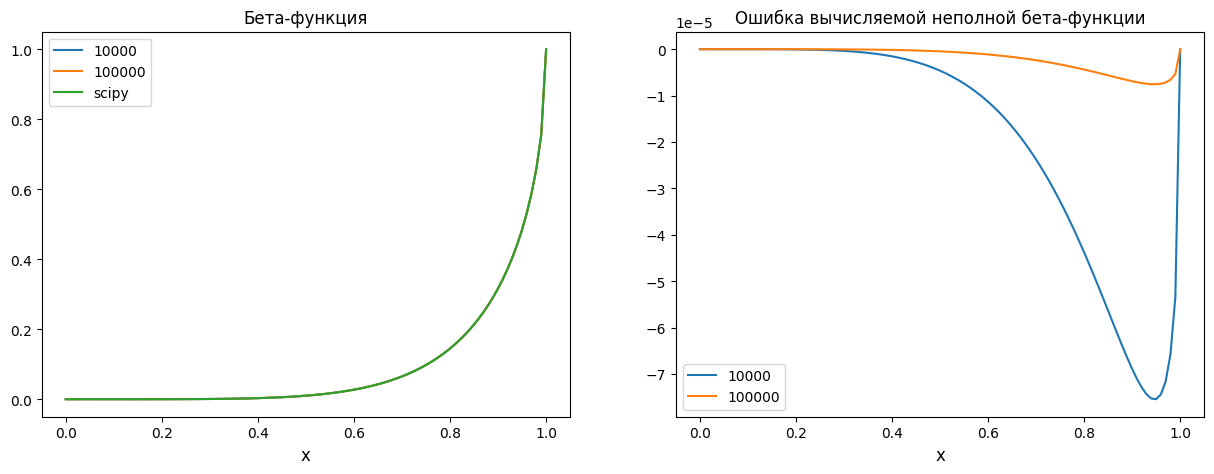

In [11]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_array, my_result_10000, label = '10000')
axs[0].plot(x_array, my_result_100000, label = '100000')


axs[0].plot(x_array, scipy_result, label = 'scipy')
axs[0].set_xlabel('x', fontsize=12)
axs[0].set_title('Бета-функция', fontsize=12)


axs[1].plot(x_array, np.array(my_result_10000) - np.array(scipy_result), label = '10000')
axs[1].plot(x_array, np.array(my_result_100000) - np.array(scipy_result), label = '100000')


axs[1].set_xlabel('x', fontsize=12)
axs[1].set_title('Ошибка вычисляемой неполной бета-функции', fontsize=12)

axs[0].legend()
axs[1].legend()
plt.show()


Ошибка в пятом знаке! Этого достаточно, чтобы p_value оценивался с ошибкой в четвертом знаке.

### Тестирую ошибку функции распределения

Построим графики "истинной" (посчитанной через scipy) функции распределения стьюдента и нашей, посчитанаю численно для разных размеров sample

Сначала для n = 10. Есть подозрение, что при большем n ошибка будет больше, так как подинтегральная функция будет более угловатой.

In [12]:
n = 10
my_result_10000 = []
my_result_100000 = []
x_array = np.linspace(-5, 5, 100)
y_true = t.cdf( x_array, df = n)


for x in (x_array):
    my_result_10000.append(my_t_cdf_sin(x, n, num = 10000))
    my_result_100000.append(my_t_cdf_sin(x, n, num = 100_000))





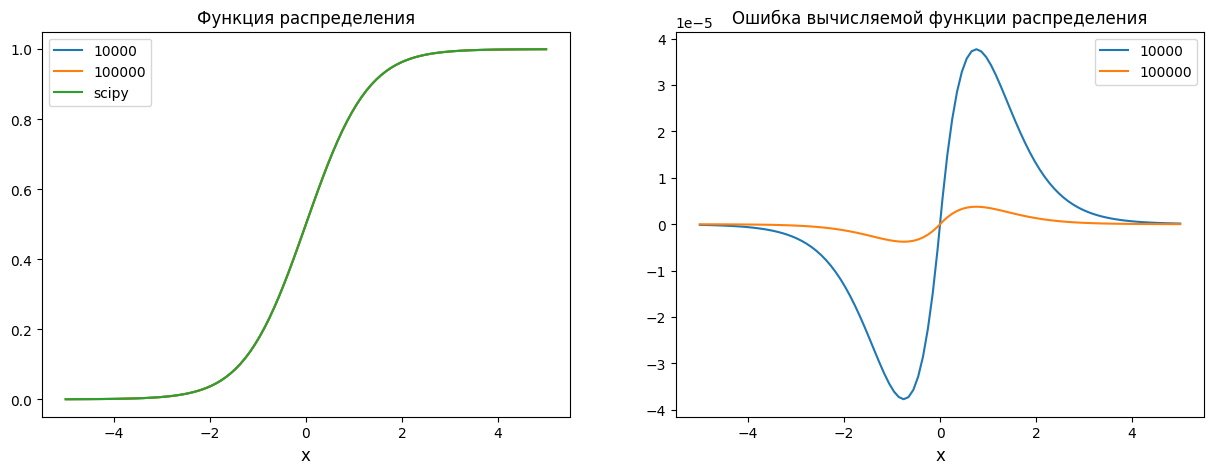

In [13]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_array, my_result_10000, label = '10000')
axs[0].plot(x_array, my_result_100000, label = '100000')


axs[0].plot(x_array, y_true, label = 'scipy')
axs[0].set_xlabel('x', fontsize=12)
axs[0].set_title('Функция распределения', fontsize=12)


axs[1].plot(x_array, np.array(my_result_10000) - np.array(y_true), label = '10000')
axs[1].plot(x_array, np.array(my_result_100000) - np.array(y_true), label = '100000')


axs[1].set_xlabel('x', fontsize=12)
axs[1].set_title('Ошибка вычисляемой функции распределения', fontsize=12)
axs[0].legend()
axs[1].legend()


Теперь $n = 100$

In [14]:
n = 100
my_result_10000 = []
my_result_100000 = []
x_array = np.linspace(-5, 5, 100)
y_true = t.cdf( x_array, df = n)


for x in (x_array):
    my_result_10000.append(my_t_cdf_sin(x, n, num = 10000))
    my_result_100000.append(my_t_cdf_sin(x, n, num = 100_000))






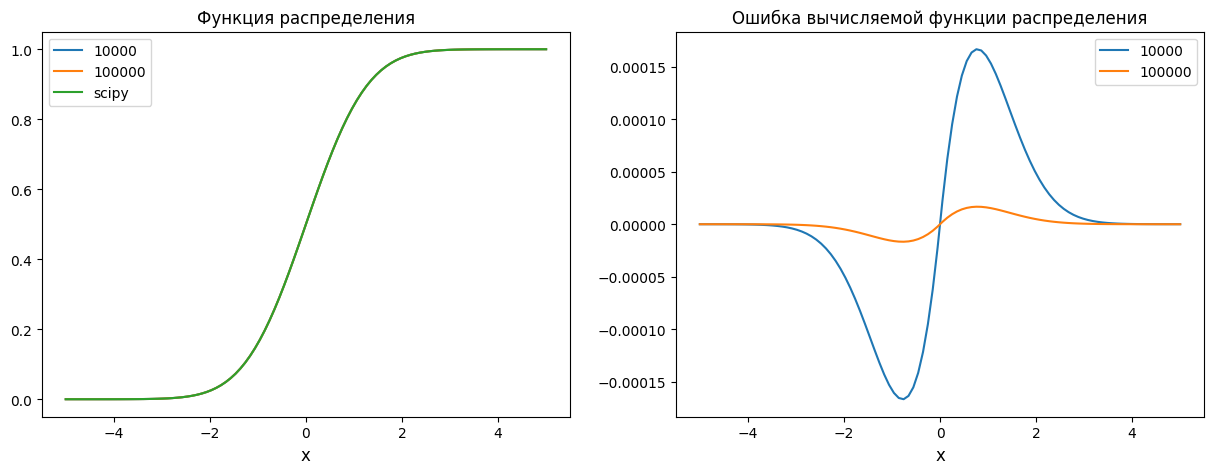

In [15]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_array, my_result_10000, label = '10000')
axs[0].plot(x_array, my_result_100000, label = '100000')


axs[0].plot(x_array, y_true, label = 'scipy')
axs[0].set_xlabel('x', fontsize=12)
axs[0].set_title('Функция распределения', fontsize=12)


axs[1].plot(x_array, np.array(my_result_10000) - np.array(y_true), label = '10000')
axs[1].plot(x_array, np.array(my_result_100000) - np.array(y_true), label = '100000')


axs[1].set_xlabel('x', fontsize=12)
axs[1].set_title('Ошибка вычисляемой функции распределения', fontsize=12)
axs[0].legend()
axs[1].legend()



In [16]:
# Автопроверка

MyTtestResults = namedtuple('MyTtestResults', ['is_rejected', 'pvalue'])

def my_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
    """
    def x_foo(t, n):
        '''
        Возвращает верхний предел интегрирования неполной бета функции.
        '''
        return n/(t**2 + n)


    def beta_x_derivative(t, a, b):
        '''
        Подинтегральная функция для вычисления неполной бета функции с параметрами a, b.
        '''
        return t**(a - 1)*(1 - t)**(b - 1)

    def beta_x_derivative_sin(t, n):
        '''
        Возвращает значение подинтегральной неполной бета функции с параметрами (n/2, 1/2)
        '''
        return 2*((np.sin(t))**(n-1))

    def my_i_x_through_sample_sin(x, n, num = 100):
        '''
        Вычисляет неполную бета-функцию с параметрами x, n/2, 1/2.
        Параметр num определяет кол-во точек для численного интегрирования.
        Интегрирование ведется 
        '''
        parameters = {'n': n}
        x = my_arcsin(x**0.5)
        ordered_sample = my_linspace(0, x, num)
        nom = three_eqight_integration(beta_x_derivative_sin, ordered_sample, **parameters)
        uniform_sample = my_linspace(0, np.pi/2, num)
        denom = three_eqight_integration(beta_x_derivative_sin, uniform_sample, **parameters)
        return nom/denom

    def my_linspace(start, stop, num):
        '''
        Возвращает равномерную сетку на отрезке [start, stop).
        Аналог np.linspace  с endpoint = False.
        '''
        step = (stop - start)/num
        result = []
        added_point = start
        for i in range(num):
            result.append(added_point)
            added_point += step
        return result

    def three_eqight_interval_appr(foo, prev_x, next_x, **kwargs):
        '''
        Аппроксимирует функцию на отрезке [prev_x, next_x] методом 3/8
        '''
        delta = next_x - prev_x
        return (foo(prev_x, **kwargs) + 3*foo((2*prev_x + next_x)/3, **kwargs) 
                + 3*foo((prev_x + 2*next_x)/3, **kwargs) + foo(next_x, **kwargs))/8*delta

    def three_eqight_integration(foo, ordered_sample, **kwargs):
        '''
        Вычисляет интеграл функции foo на упорядоченном массиве ordered_sample
        '''
        N = len(ordered_sample)
        i = 1
        result = 0
        while i < N:
            next_x = ordered_sample[i]
            prev_x = ordered_sample[i-1]
            result += three_eqight_interval_appr(foo, prev_x, next_x, **kwargs)
            i += 1

        return result


    def my_t_cdf_sin(t, df, num = 10_000):
        '''
        Вычисляет функцию распределения Стьюдента с df степенями свободы в точке t. 
        Параметр num определеляет число точек для численного интегрирования.
        
        '''
        n = df
        x = x_foo(t, n)
        i_x = my_i_x_through_sample_sin(x, n, num)
        if t >= 0:
            return 1 - i_x/2
        else:
            return i_x/2
    
    
    is_rejected = None
    pvalue = None
    n = len(sample)
    T = (n**0.5)*(mean(sample) - mu_0)/std(sample, ddof = 1)
    
    t_cdf = my_t_cdf_sin(T, n-1, num = 1_000_000)
    
    if T > 0:
        pvalue = 2*(1 - t_cdf)
    else:
        pvalue = 2*t_cdf
        

    is_rejected = (pvalue <= alpha)

    return MyTtestResults(is_rejected, pvalue)


- Для получения полного балла, p-value вашего критерия не должно отличаться от p-value `scipy.stats.ttest_1samp` больше, чем на 10^-3.
- Если ваш код для одного теста работает больше минуты - он не засчитывается.

In [17]:
from scipy.stats import ttest_1samp

In [18]:
sample = norm.rvs(size = 1000)


my_res = my_t_test(sample, 0)
their_res = ttest_1samp(sample, 0)

print('statistics', their_res[0], my_res[0])
print('pvalue',  their_res[1], my_res[1])


statistics 0.5624247810174898 False
pvalue 0.5739528163161386 0.5739421135022682


In [19]:
from tqdm import trange

In [20]:
# посчитаю FPR, чтобы убедиться что он в районе 5%
from scipy.stats import norm, expon
counter = 0
exp_number = 100
delta = []
for _ in trange(exp_number):
    sample = norm.rvs(size = 1000)
    my_result = my_t_test(sample, mu_0 = 0)
    their_res = ttest_1samp(sample, 0)
    counter += my_result[0]
    delta.append(their_res[1] - my_result[1])

FPR = counter/exp_number



  1%|▍                                          | 1/100 [00:07<11:52,  7.20s/it]


KeyboardInterrupt: 

In [ ]:
print(FPR)

In [ ]:
delta = np.abs(np.array(delta))
print(max(delta), mean(delta), std(delta))

Видим что все ок, ошибка в хорошем знаке.

## Задача 3 (4 балла)

### На зачет

**1. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_0$:

- Зафиксировать $\mu = 0,\ \mu_0 = 0$ ($H_0$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок первого рода (False Positive Rate)
- Проверить, стат значимо или нет на уровне 5% отличается полученный процент ошибок от теоретического $\alpha$.


**2. (1.5 балла)**

Провести эксперимент 1 с разными параметрами $n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

--- 
**3. (0.5 баллов)**

Написать код для проверки критерия при корректности $H_1$:

- Зафиксировать $\mu \neq 0,\ \mu_0 = 0$ ($H_1$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок второго рода (False Negative Rate)
- Построить доверительный интервал для мощности критерия при заданном $\mu$.

**2. (1.5 балла)**

Провести предыдущий эксперимент с разными параметрами $\mu, n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

In [21]:
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import norm



In [22]:
mu = 0

sigma_array = np.array([0.1, 1.0, 10., 20, 50,  100.])
alpha_array =  np.array([0.1, 0.05, 0.01])
n_array = np.array([10, 100, 1000, 10_000])
n_exp = 10_000

In [23]:
### фиксирую sigma, n, alpha
n = 100
sigma = 1
alpha = 0.05

error_counter = 0
for i in range(n_exp):
    sample = norm.rvs(size = n, loc = mu, scale = sigma) 
    error_counter += my_simple_t_test(sample, mu, alpha)[0]
    
    
    
FPR = error_counter/n_exp
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')


print(f'FPR =  {FPR}, \nДоверительный интервал = {pc[0]:.3f}-{pc[1]:.3f}')
    

FPR =  0.0483, 
Доверительный интервал = 0.044-0.053


Если доверительный интервал включает $0.05$, то FPR статзначимо не отличается от заявленного $\alpha = 0.05$.

Теперь фиксируем $n$, и посмотрим что меняется в зависимости от $\sigma$ и $\alpha$.

In [24]:
n = n_array[0]
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 10000
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FPR = error_counter/n_exp

        

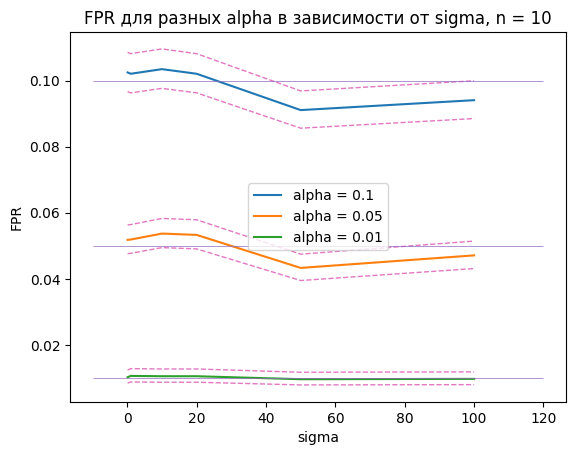

In [25]:

for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FPR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FPR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

- Во всех случаях истинное значение $\alpha$ лежит в доверительном интервале. Это логично. 
- Кажется что от дисперсии ничто не зависит.
- От $\alpha$ зависит ширина доверительного интервала.

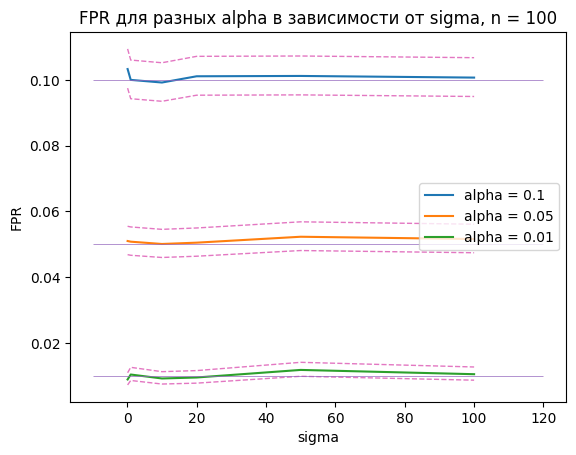

In [26]:
n = n_array[1]
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 10000
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FPR = error_counter/n_exp

for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FPR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FPR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

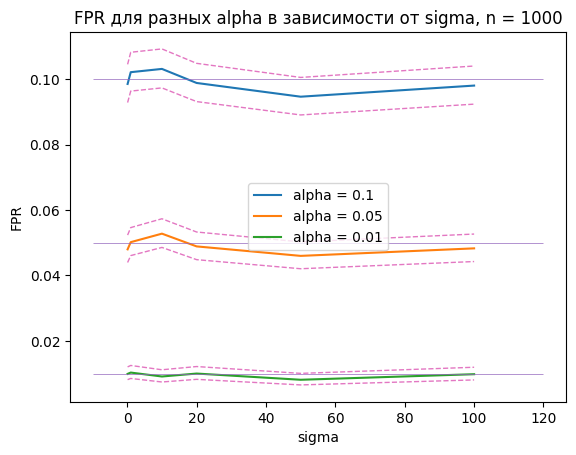

In [27]:
n = n_array[2]
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 10000
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FPR = error_counter/n_exp

for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FPR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FPR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

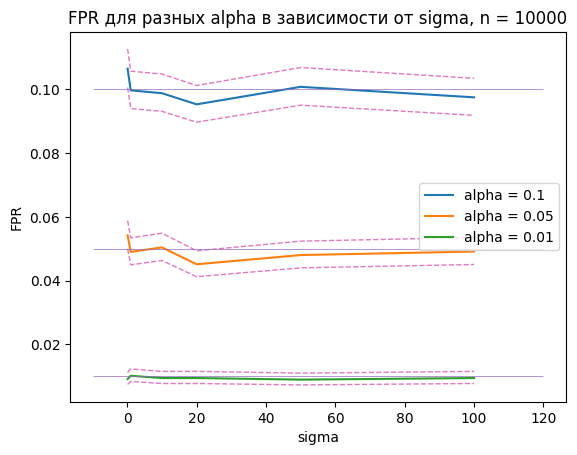

In [28]:
n = n_array[3]
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 10000
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FPR = error_counter/n_exp

for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FPR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FPR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

Все графики аналогичные. В одном случае истинное значение $\alpha$ вышло за пределы доворительного интервала, но на то он и доверительный 95%.

__Выводы__: от параметров $\sigma, \ \alpha, \ n$ ничего не зависит. Это совершенно нормально, так как эти параметры закладывались в формулу при выводе t-теста. Однако, кажется что велинина $n$ будет иметь влияние при отклонении от модельных данных. То есть t-тест имеет свои ограничения: он всегда работает на нормальных данных и при больших n. Однако если бы смотрели эксперимент не на нормальных данных, FPR мог бы быть выше. Это я к тому, что наблюдаемое отсутсвие отличий с одной стороны тривиально, с другой стороны имеет место только при выполнении условий t-теста и эти выводы нельзя экстраполировать далеко.

### Часть вторая

In [29]:
mu = 0

sigma_array = np.array([0.1, 1.0, 10., 20, 50,  100.])
mu_array = 1/sigma_array
alpha_array =  np.array([0.1, 0.05, 0.01])
n_array = np.array([10, 100, 1000, 10_000])

n_exp = 10_000

In [30]:
mu = 0.1
sigma = 1.
n = 100
error_counter = 0
n_exp = 10_000
alpha = 0.05
for _ in range(n_exp):
    sample = norm.rvs(size = n, loc = mu, scale = sigma)
    error_counter += my_simple_t_test(sample, 0, alpha)[0]
    

    
        
FNR = error_counter/n_exp
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')


print(f'FNR =  {FNR}, \nДоверительный интервал = {pc[0]:.3f}-{pc[1]:.3f}')

FNR =  0.168, 
Доверительный интервал = 0.161-0.175


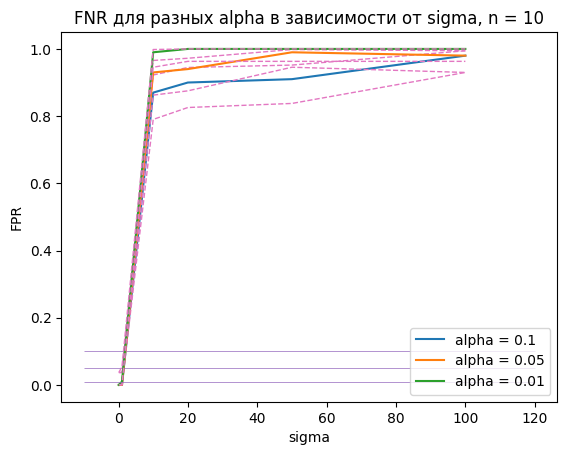

In [31]:
n = n_array[0]
mu = 2.
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 100
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FNR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FNR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

- ожидаемо чем больше одибка первого рода, тем меньше ошибка второго рода
- чем больше $\sigma$, тем больше ошибка второго рода, потому что с большей дисперсией большие отклонения от среднего, можно списать на счет этой большой дисперсии. К тому же мы знаем, что MDE прямо пропорционален дисперсии

В формуле MDE в знаменателе стоит корень из N. То есть при увеличении N, мы ожидаем наблюдать большую мощность.Давайте посмотрим.

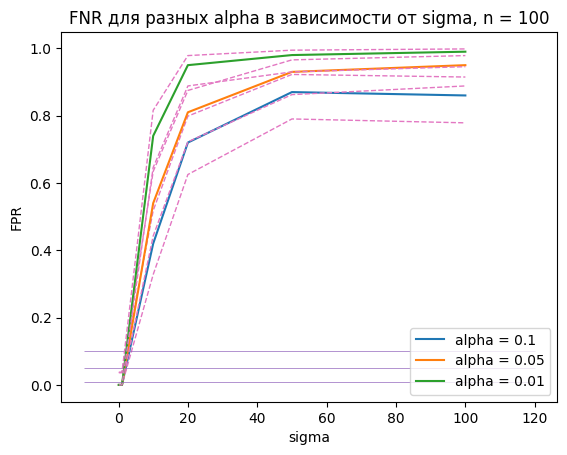

In [32]:
n = n_array[1]
mu = 2.
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 100
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FNR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FNR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

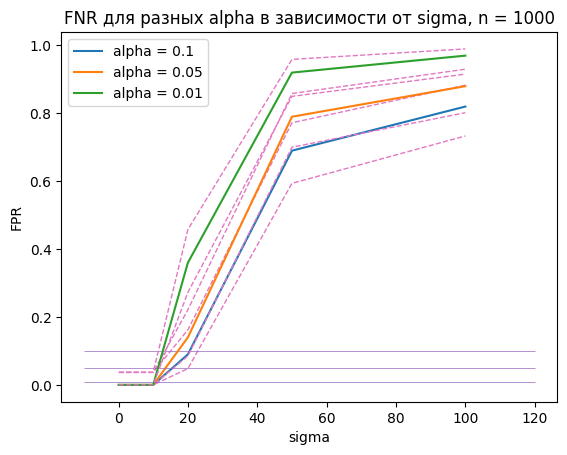

In [33]:
n = n_array[2]
mu = 2.
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 100
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FNR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FNR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

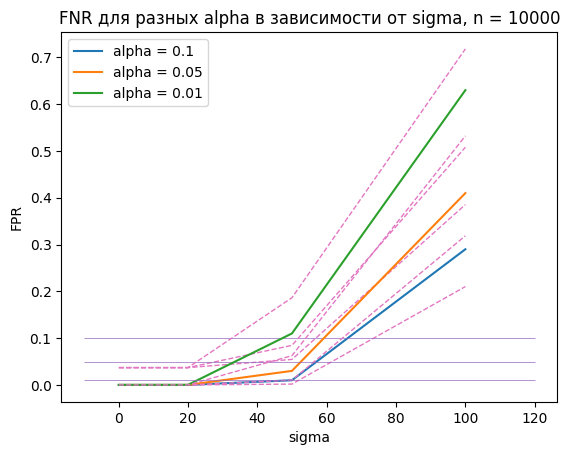

In [34]:
n = n_array[3]
mu = 2.
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 100
for _ in range(n_exp):
    for i, sigma in enumerate(sigma_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(sigma_array, FNR[:, j], label = f'alpha = {alpha}')
    plt.plot(sigma_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(sigma_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.hlines(alpha, xmin = -10, xmax = 120, color = 'tab:purple', linewidth = 0.5)

    
plt.title(f'FNR для разных alpha в зависимости от sigma, n = {n}')
plt.xlabel('sigma')
plt.ylabel('FPR')


plt.legend()
plt.show()

Действительно, большему N, соответсвует большая мощность. Осталось посмотреть на зависимость от истинного $\mu$.

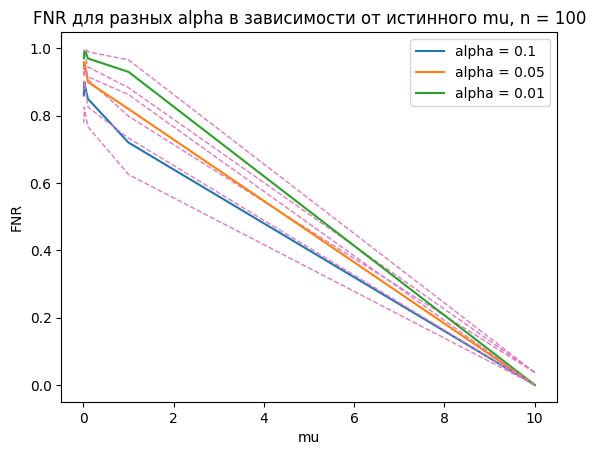

In [35]:
n = n_array[1]
sigma = 10
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 100
for _ in range(n_exp):
    for i, mu in enumerate(mu_array):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]


                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(mu_array, FNR[:, j], label = f'alpha = {alpha}')
    plt.plot(mu_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
    plt.plot(mu_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)

    
plt.title(f'FNR для разных alpha в зависимости от истинного mu, n = {n}')
plt.xlabel('mu')
plt.ylabel('FNR')


plt.legend()
plt.show()

- так же: чем больше ошибка первого рода, тем меньше ошибка второго рода
- чем больше $\mu$, тем меньше ошибка первого рода, так как проще заметить большее отклонение.

$\sigma$ и $\mu$ оказывает противоположный эффект на мощность. Возникает ощущение, что при фиксированном их отношении мы будем наблюдать одинаковую мощность





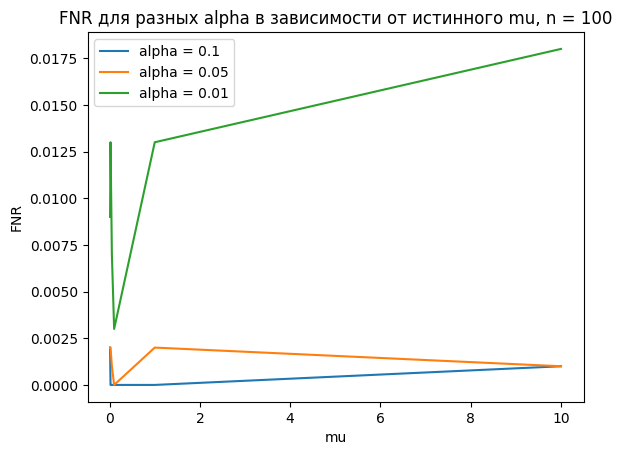

In [36]:
error_counter = np.zeros((len(sigma_array), len(alpha_array)))
n_exp = 1000
n = 100
for _ in range(n_exp):
    for i, (mu, sigma) in enumerate(zip(mu_array, 2*mu_array)):
        sample = norm.rvs(size = n, loc = mu, scale = sigma)
        for j, alpha in enumerate(alpha_array):
                error_counter[i, j] += not my_simple_t_test(sample, 0, alpha)[0]
                
                
pc = proportion_confint(count = error_counter, nobs = n_exp, alpha=0.05, method='wilson')
FNR = error_counter/n_exp



for j, alpha in enumerate(alpha_array):
    plt.plot(mu_array, FNR[:, j], label = f'alpha = {alpha}')
#     plt.plot(mu_array, pc[0][:, j], '--', color = 'tab:pink', linewidth = 1)
#     plt.plot(mu_array, pc[1][:, j], '--', color = 'tab:pink', linewidth = 1)

    
plt.title(f'FNR для разных alpha в зависимости от истинного mu, n = {n}')
plt.xlabel('mu')
plt.ylabel('FNR')


plt.legend()
plt.show()              
    



Здесь я взял отношение $\sigma/\mu = 2$ и мы видим, что FPR одинаков для разных $\mu$. Это справедливо для любого n. Интуитивно это абсолютно понятно, так как MDE прямо пропоционален дисперсии.

__Итого:__
- мощность убывает с увеличением дисперсии
- мощность растет с увеличением истинного $\mu$
- мощность растет с ростом $\alpha$
- мощность не меняется при фиксированном отношении $\mu/\sigma$ и растет с увеличением этого отношения
- мощность увеличивается с ростом размера выборки

## Задача 4 (2 балла)

### На зачет

Петя скачал себе новую игру себе на телефон. Чтобы начать в нее играть, она должна загрузиться от 0% до 100%, где каждый процент игры загружается независимо ни от чего, и время загрузки каждого процента подчиняется экспоненциальному распределению со средним в 2 сек. Но вот незадача: через 3 минуты Пете надо бежать на автобус к бабушке в деревню, а в дороге Петя хочет уже поиграть( Но игра может скачаться только при подключенном домашнем WI-FI, то есть только только в течение этих 3 минут. С какой вероятностью игра успеет загрузиться и Петя сможет поиграть в дороге? В ответе можно использовать следующие функции распределения:

- Экспоненциальное
- Нормальное
- Равномерное



Пусть $X_i$ - время загрузки i-того процента игры. Это независимые одинакого распределенные случайные величины с распределением $X_i \sim Exp (\lambda)$, где $\lambda = 1/2$. Тогда сумма будет иметь распределение Гамма, но им пользоваться нельзя. Тогда попробуем через ЦПТ. Матожидание и дисперсия равны $EX_1 = 1/\lambda, \ DX_1 = 1/\lambda^2$. Обозначим $X = \sum X_i, \ \bar{X} = \ \dfrac{\sum X_i}{n}$Тогда по ЦПТ:

$\sqrt{n} \dfrac{\bar{X} - EX_1}{\sqrt{DX_1}} \stackrel{d}{\rightarrow} N(0, 1)$

$\sqrt{n} \dfrac{\bar{X} - 1/\lambda}{1/\lambda} \stackrel{d}{\rightarrow} N(0, 1)$

$\sqrt{n} \dfrac{X - n/\lambda}{n/\lambda} \stackrel{d}{\rightarrow} N(0, 1)$

$P(\text{Петя успеет}) = P(X \leq 180) = P(X - n/\lambda \leq 180 - n/\lambda) = P(\sqrt{n} \dfrac{X - n/\lambda}{n/\lambda} \leq \sqrt{n} \dfrac{n 180 - n/\lambda}{n/\lambda}) = F\left(\sqrt{n}\dfrac{180 - n/\lambda}{n/\lambda}\right)$, где $F(\cdot)$ - функция распределения стандартного нормального распределения. Давайте посчитаем.

In [37]:
n = 100
l = 1/2
x = n**(0.5)*(180 - n/l)/(n/l)
print(f'x = {x} \nФункция распределения в этой точке {norm.cdf(x):0.3f}')

x = -1.0 
Функция распределения в этой точке 0.159


То есть вероятность, что Петя успеет около 16%.   
Хочется проверить, ниигде ли я не накосячил. Давайте просимулируем время загрузки игры большое количество раз и посмотрим в каком проценте случаев игра загружается быстрее 180 секунд.

In [38]:
n_exp = 100000
on_time_counter = 0
results = []
for i in range(n_exp):
    sample = expon.rvs(size  = 100, scale = 2)
    time_of_downloading = sum(sample)
    results.append(time_of_downloading)
    on_time_counter += (time_of_downloading <= 180)
    
    
print(on_time_counter/n_exp)

0.15991


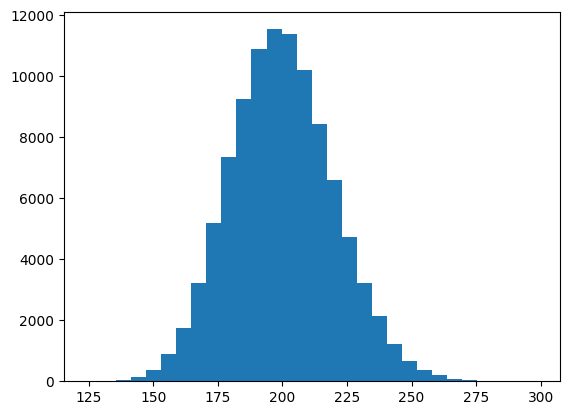

In [39]:
plt.hist(results, bins = 30)
plt.show()

Видим, что распределение похоже на нормальное со средним $n/\lambda = 200$ и среднеквадратичным отклонением $\sqrt{n}\lambda  = 20$. После симуляции эксперимента 100 000 раз "Петя успел" в около 16% случаев. Здесь важно подчеркнуть, что я не предоставляю решение задачи методом Монте-Карло. В этом случае нужно было бы что-то сказать про доверительный интервал, так как `on_time_counter/n_exp` - это тоже случайная величина, которая имеет свое распределение. Это просто проверка на дурака, не потерял ли я где то множитель.

## Задача 5 (3 балла)

### На зачет

Пусть есть равные группы A и B. По результатам теста выручка от одного пользователя в среднем в условиях A оценивается Стьдентом как 50 ± 3 руб, а в условиях B как 56 ± 4 руб. Аналитик, увидев такие результаты, говорит, что эффект составил 6 ± 7 руб, а значит результат AB-теста не стат. значим. Все ли корректно в этих рассуждениях? Любой ответ должен быть аргументирован. В случае, еcли в рассуждениях есть ошибка, то надо также посчитать корректно доверительный интервал.


Нам дано, что $\bar{A} = 50, \ \bar{B} = 56, \ \dfrac{z \hat{S}_A}{\sqrt{N}} = 3, \ \dfrac{z \hat{S}_B}{\sqrt{N}} = 4$, где $z$ - квантиль распределения Стьюдента с $N - 1$ степенью свободы уровня $1 - \alpha/2$. Пусть истинное значение эффекта равно $\mu$.  
Тогда $T  = \dfrac{(\bar{A} - \bar{B}) - \mu}{\sqrt{\hat{S}^2_A/N + \hat{S}^2_B/N}} \sim St_{\nu}$,   
где $v = \dfrac{\left(\dfrac{S^2_{A}}{N} + \dfrac{S^2_{B}}{M} \right)^2}{\left(\dfrac{(S^2_{A})^2}{N^2(N - 1)} + \dfrac{(S^2_{B})^2}{M^2(M-1)} \right)} $

(Здесь велико желание упросить ситуацию и использовать нормальную аппроксимацию, но пусть будет так, потом успеем упростить.)
$$ T =  \dfrac{(\bar{A} - \bar{B}) - \mu}{\sqrt{\hat{S}^2_A/N + \hat{S}^2_B/N}} =  \dfrac{(\bar{A} - \bar{B}) - \mu}{\sqrt{9N/(z^2N) + 16N/(z^2N)}} = \dfrac{(\bar{A} - \bar{B}) - \mu}{\sqrt{9/(z^2) + 16/(z^2)}}  = \dfrac{(\bar{A} - \bar{B}) - \mu}{\sqrt{25/z^2}}$$

Обозначим $\sigma^2 = 25/z^2$ или $\sigma = 5/z$, тогда 

$$\dfrac{(\bar{A} - \bar{B}) - \mu}{\sigma} \sim St_{\nu} $$ и доверительный интервал для $\mu$, где под $t_{1 - \alpha/2}$ я подразумеваю квантиль распределения $St_{\nu}$

$$(\bar{A} - \bar{B}) - t_{1 - \alpha/2}\sigma, \  (\bar{A} - \bar{B}) + t_{1 - \alpha/2}\sigma = (\bar{A} - \bar{B}) - 5t_{1 - \alpha/2}/z, \  (\bar{A} - \bar{B}) + 5t_{1 - \alpha/2}/z$$


Или это можно сформулировать так: наша оценка для эффекта $6 \pm 5 t_{1 - \alpha/2}/z$.

Если использовать нормальную аппроксимацию (дважды! при оценке отклонения точечных оценок $\bar{A}$ и $\bar{B}$ и при двухвыборочном t-тесте), то наша оценка будет $6 \pm 5$, а не $6 \pm 7$, а значит эффект статзначим.

Интересно попробовать оценить результат, не польнузуясь ЦПТ. В точечной оценке распределение Стьюдента имеет $N - 1$ степень свободы. Если подставить значения в формулу для $\nu$, мы получим что распределение статистики T имеет $25(N - 1)$ степень свободы. Хвосты распределения Стьюдента "утоньшаются" с ростом степеней свободы, так как распределение стремится к нормальному. А значит при большем числе степеней свободы квантиль распределения статистики $T$ с $25(N - 1)$ степенью свободы будет меньше: $t_{1 - \alpha/2} < z$ и отрезок $6 \pm 5 t_{1 - \alpha/2}/z$ будет точнее, то есть будет лежать внутри $6 \pm 5$.

In [40]:
from scipy.stats import t

In [41]:
z_array = []
t_array = []
alpha = 0.05
for n in np.arange(2, 100):
    z_array.append(t.ppf(1 - alpha/2, df = n - 1))
    t_array.append(t.ppf(1 - alpha/2, df = 25*(n - 1)))


Text(0.5, 0, 'Размер выборки')

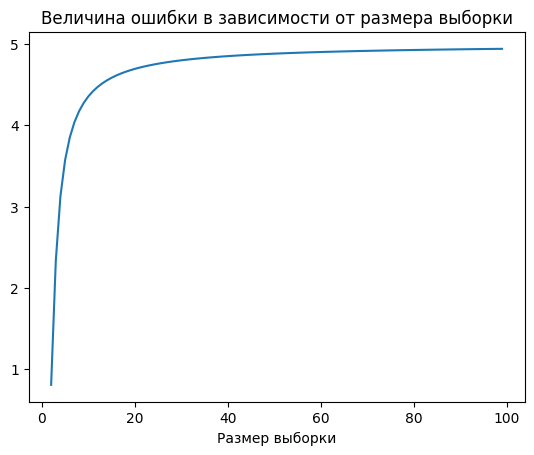

In [42]:
plt.plot(np.arange(2, 100), 5*np.array(t_array)/np.array(z_array))
plt.title("Величина ошибки в зависимости от размера выборки")
plt.xlabel('Размер выборки')

Но кажется, этот результат нас особо не интересует, так как наблюдаемое укорачивание доверительного интервала возможно лишь при совсем малом числе наблюдений $N < 15$. 

__Итого__: доверительный интервал для эффекта $6 \pm 5$, то есть эффект статзначим. 

## Задача 6

### Пункт А. 1 балл: 
#### На зачет

Какая связь между MDE и шириной доверительного интервала в t-test уровня значимости $\alpha$? Точнее, между MDE и `CI length / 2` (шириной дов. интервала пополам).

При каких параметрах ($\alpha,\ \beta$) они будут равны?



Предположим, что мы рассматриваем двустороннюю альтернативную гипотезу. 
Фиксируем $\alpha, \beta$. 

Тогда длина доверительного интервала пополам `CI length / 2` $ = \dfrac{z_{1- \alpha/2}S}{\sqrt{N}}$.

$\text{MDE} = (z_{1 - \alpha/2} + z_{1 - \beta}) \cdot \dfrac{S}{\sqrt{N}}$  
Эта формула отличается от формулы с лекции тем, что я пишу $z_{1 - \alpha/2}$ вместо $z_{1 - \alpha}$, так как в нашем случае алтернатива двухсторонняя. 

То есть $\text{MDE} = CI/2 + z_{1 - \beta} \cdot \dfrac{S}{\sqrt{N}}$. При $\beta = 0.5$ они равны. Это логично: если истинное значение отличается на `CI length / 2` от тестируемого, то истинное значение совпадает с критической границей. И тогда (при истинности такой альтернативной гипотезы) вероятности наблюдения более низкого или более высокого значения статистики равны $0.5$ в силу симметричности нормального распределения.

### Пункт B. 2 балла: 

Допустим, вам дан критерий $\Psi$ для провекри гипотезы $H_0: D \overline X = \sigma^2$. Статистика критерия &mdash; $S^2$, а сам критерий является черным ящиком. Можно ли найти такие параметры $\alpha$, $\beta$, чтобы значение MDE равнялась `CI length / 2` уровня значимости $\alpha$? При этом вы не знаете распределения $S^2$?

Какого свойства распределения статистики вам не хватает, чтобы можно было без знания самого распределения приравнять MDE и половину ширины дов. интервала?

Пусть мы рассматриваем одностороннюю альтернативу. Тогда критическая область это $C = (x: x > s_{1 - \alpha})$, где $s$ квантиль распределения статистики $S^2$  при истинности нулевой гипотезы.

Тогда MDE = m > 0 такое, что $$P(S^2 \leq s_{1 - \alpha}| H_1: DX = \sigma^2 + m) = \beta$$

Если мы знаем распределение статистики $S^2$, то мы можем решить это уранвение относительно $m$. Если нет, то нам потребуется предположение, что при увеличении оцениваегомого параметра на какую то величину, распределение статистики сдвигается на эту величину вправо. Тогда дальнейшее справедливо

$$P(S_0^2 + m \leq s_{1 - \alpha}) = \beta$$
$$P(S_0^2 \leq s_{1 - \alpha} - m) = \beta$$
$$ - m + s_{1 - \alpha} = s_{\beta}$$
$$ m =  s_{1 - \alpha}  - s_{\beta}$$


Доверительный интервал: $(s_{\alpha/2}, \ s_{1 - \alpha/2}  )$

$$CI/2 = MDE$$

$$s_{1 - \alpha/2} - s_{\alpha/2} = 2(s_{1 - \alpha}  - s_{ \beta})$$

## Задача 7 (1 балл)

### Пункт А. 1 балл:

Пусть даны независимые выборки $A, B$ равного размера. То есть у вас есть выборки $A_1, A_2, \dots A_N$ и $B_1, B_2, \dots B_N$, N большое.

Докажите теоретически, что в этом случае вы можете точно также использовать `T'-test`. То есть:

$T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$, 
Где $S^2$ &mdash; статистика S^2 для некоторой выборки



Рассмотрим статистику $Z = A - B$. Считаем, что $A, \ B$ удовлетворяют условиям ЦПТ, то есть иммеют второй конечный момент и независимы. Тогда у случайной величины $Z$ так же конечный второй момент и $z_i$ независимы. Найдем матожидание и дисперсию $Z$ при справедливости нулевой гипотезы и воспользуемся ЦПТ.  

- $EZ = E(A - B) = EA - EB = 0$
- $DZ = D(A - B) = DA + DB = \sigma^2_A  + \sigma^2_B = \sigma^2_Z$


Тогда при справедливости нулевой гипотезы о равенстве средних и большом $N$, справедово приближение ЦПТ:

$\sqrt{N}\dfrac{\overline Z - 0}{\sigma_Z} \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$


Определелим статистику:

$T = \sqrt{N}\dfrac{\overline Z}{\sqrt{S^2}} = \sqrt{N}\dfrac{\overline Z}{\sqrt{\sigma_Z^2}}\cdot \sqrt{\dfrac{\sigma_Z^2}{S^2}}$,  

где $S^2 = \dfrac{1}{N-1}\sum (z_i - \overline z)^2 = \dfrac{1}{N-1}\sum (a_i - \overline a - b_i + \overline b)^2 $ исправленная выборочная дисперсия для случайной величины $Z$. Известно, что эта оценка для дисперсии несмещенная и состоятельная. То есть $\dfrac{\sigma_Z^2}{S^2}\stackrel{p}{\rightarrow} 1$. Тогда по теореме Слуцкого  
$T  = \sqrt{N}\dfrac{\overline Z}{\sqrt{S^2}} \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$

Или расписывая среднее выборочное $Z$ и пользуясь тем, что $N$ велико:

$T = \dfrac{\overline A - \overline B}{\sqrt{S^2/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$


Что и требовалось показать.



### Пункт B* 2 балла:

Докажите что в этом случае

- $T(A, B) = \dfrac{\overline A - \overline B}{\sqrt{S^2_{A}/N + S^2_{B}/N}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$


- $EZ = E(A - B) = EA - EB = 0$
- $DZ = D(A - B) = DA + DB = \sigma^2_A  + \sigma^2_B = \sigma^2_Z$


Тогда по ЦПТ:

$T = \sqrt{N} \dfrac{\overline A - \overline B}{\sqrt{\sigma^2_{A} + \sigma^2_{B}}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$

Возьмем $S^2_A, \ S^2_B$ в качестве несмещенных состоятельных оценок для $\sigma^2_A, \  \sigma^2_B$. По теореме (которую иногда также называют теоремой Слуцкого), сумма двух величин сходящихся по вероятности сходится к сумме пределов. Или можно использовать continous mapping theorem для двумерного функционала "суммы". Тогда по теореме Слуцкого 

$T = \sqrt{N} \dfrac{\overline A - \overline B}{\sqrt{S^2_{A} + S^2_{B}}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$


Тут возникает вопрос. У нас есть три критерия для решения одной и той же задачи: два критерия выше и критерий Аспина-Уелша с лекции. Какой лучше? Чтобы ответить на этот вопрос, сначала ответим на два вопроса:
- что значит лучше? Ответ: 
    - при выбранном $\alpha$ критерий лучше, если имеет большую мощность. (отдельный вопрос что делать, когда заявленный уровень значимости не выполняется, то есть фактический FPR мы получаем больше $\alpha$,  а я уверен, что такое наверняка будет, так как мы используем аппроксимацию )
    - рабостен, то есть справедллив для даже при сильных отклонениях от нормальности и работает при небольшом N. (Это исследовать мы не будем)
- как мы будем это исследовать? Конечно методом Монте-Карло. Интересно рассмотреть такие разрезы:
   - Разные N, например 30, 100, 1000.
   - Разные распределения: нормальное; ненормальное "хорошее", например, экспоненциальное; ненормальное "плохое", например, распределение Коши

Тут я хотел потестировать все это Монте-Капло, но не успел.

Дано: две независимые случайные величины (произвольного распределения, но с конечными первыми двумя моментами) $A$ и $B$ со среднимим $\mu_A, \ \mu_B$ и дисперсиями $\sigma_A^2, \ \sigma_B^2$ соответсвенно.  
Определим случайную величину $Z = A - B$.  
Что мы знаем про нее?
- распределение не знаем
- Знаем матожидание: в силу линейности матожидания $EZ = E(A - B) = EA - EB = 0$
- Знаем дисперсию: в силу независимости случайных величин $A, \ B$ имеем  $DZ = D(A - B) = DA + DB = \sigma^2_A  + \sigma^2_B = \sigma^2_Z$  


Нигде здесь не использовались предельные переходы. Только сейчас я пользуюсь ЦПТ для случайной величины Z:
если дана последовательность iid $Z_n$, то 
$\sqrt{N}\dfrac{\overline Z - \mu_z}{\sigma_z} \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$

Последовательность нам уже дана, просто по определению случайной величины $Z$  
$Z_k = A_k - B_k$, матожидание $\mu_z = 0 $ и дисперсию $\sigma_z = \sigma^2_A  + \sigma^2_B$ мы посчитали выше. $\overline Z =  \sum Z_k/N = \sum (A_k - B_k)/N = \sum A_k/N - \sum B_k/N = \overline A -  \overline B$. Подставляю это выше и пользуясь тем, что $N$ достаточно велико, получаем  

$T = \sqrt{N} \dfrac{(\overline A - \overline B) - 0 }{\sqrt{\sigma^2_{A} + \sigma^2_{B}}} \overset{H_0}{\sim} \mathcal{N}(0, 1)$




## Задача 8* (3 балла)

На занятии мы увидели, почему большой размер выборки помогает точнее получить оценку для матожидания случайной величины. Используя аппарат математической статистики, покажите, какому товару стоит доверять больше. Возможно, вам придётся использовать допущения, но такова жизнь.

Согласны ли вы с автором поста? Есть ли дополнительные (не связанные с математикой) причины доверять правому товару больше чем левому?

![](https://i.ibb.co/HHWfF8s/change.jpg)

Сразу накидаю все идеи:
1. Проблема со статзначимостью. Мы наблюдаем точеченую оценку, полученную из некоторого распределения. Чем больше n, тем меньше доверительный интервал. А значит доверительный интвервал для 2к отзывов может быть в районе $\pm  0.1$, в то время как для 19 отзывов например: (3.0, 5.0). Дальше в неашей модели предполагаем, что люди сильно  risk-averse, и для них вероятность получения товара такого низкого качества как 3.0 недопустима. 
2. Малое количество оценкок может быть накручено: продавец может попросить друзей поставить оценки
3. Сам маркетплейс может  настойчиво просить покупателей товара с маленьким кол-вом оценок оценить товар, хотя эти покупатели не хотели отсавлять отзыв и вообще еще не успели адекватно поиспользовать товар и они поставят 5 звезд лишь бы отстали. Тем самым, при маленьком кол-ве отзывов оценка может строиться на не репрезантивной выборке покупателей. Впрочем, вряд ли об этом думают люди которые смотрят на оценки и выбирают товар.
4. Малое кол-во отзывов может свидетельствовать о том, что товаром пока что пользовались малое время. Например, у дорогого (следовательно покупателей мало) матраса может быть отличные оценки в первый год, коглда он полностью устраивает пользователя. Но через n лет, матрас может выйти из строя, несмотря на гарантию. Если же у матраса очень много отзывов, это значит что долгие годы люди покупают этот матрас и оценка скорректирована возможными проблемами длительного использования.


Первую мысль можно более формально проанализировать. Остальные идеи не понятно как (да и зачем) формализовывать.  

Итак: у нас следующая модель. Пусть распределение оценок для товара подчиняется нормальному распределению $X_i \sim N(\mu, \sigma^2)$. Это распределение равняется распределению внутренних оценок пользователей (то есть человек может сам для себя оценить товар, но не заходить на маркетплейс чтобы оставить отзыв или оценку.) Это предположение освобождает нас от пролбем 2-3. Нас интересует оценка для матожидания нашего распределения $\mu$. Наша точечная оценка -  выборочное среднее $\bar{X}$. Доверительный интвервал $\bar{X} \pm z_{1-\alpha/2}\dfrac{\sigma}{\sqrt{n}}$. Отсюда вимдно что длина доверительного интервала уменьшается с размером выборки. Однако тут две проблемы:
- Я предполагаю, что распредление оценок нормально. Но так быть не может так как оценки дискретны, да еще и ограниченны 5 значениями. Я убежден, что в рамках модели на это можно закрыть глаза. Если угодно можно использовать например бета-распределение, чтобы исправить проблему с неограниченностью или даже мультиномиальное распределение. Я этого не делаю, так как это увеличит кол-во входных параметром и не изменит выводы. 
- Из за того что оценки меняются в интервале от 1 до 5, доверительный интервал $\bar{X} \pm z_{1-\alpha/2}\dfrac{\sigma}{\sqrt{n}}$ может выходить за эти рамки. Эту проблему несложно решить в общем случае, но я сделаю еще проще, зная что в картинке слева точечная оценка в точности равна 5.0 - тогда я определяю доверительный интвервал как $\bar{X} - z_{1-\alpha}\dfrac{\sigma}{\sqrt{n}}, \bar{X}$. Для правой картинки я пользуюсь тем, что размер выборки велик (совсем грубо $\dfrac{1}{\sqrt{n}} \approx \dfrac{1}{2000} \approx \dfrac{1}{40}$), то есть для разумных значений квантилей и $\sigma$ половина доверительного интервала не превосходит $0.4$ и правай граница доверительного интервала не превосходит $5.0$.
- Чему равна дисперсия? Тут я не знаю выборку, вижу только точечные оценки, а значит не могу даже оценить дисперсию. Однако эта проблема решается, если посмотреть на распределение оценок и посчитать вбыорочную дисперсию в каждом конкретном случае. Или же мы можем решить задачу для всех возможных (разумных) значений $\sigma$. Что то мне подсказывает что от значения $\sigma$, выводы не меняются.


Давайте фиксируем уровень значимости $\alpha = 0.05$, и посмотрим как будут выглядеть наши дловерительные интвервалы для разных значений $\sigma$.




In [43]:
from scipy.stats import norm

In [44]:
alpha = 0.05
n_1 = 19
n_2 = 2280
sigma_array = np.linspace(0.1, 5, 100)
estimator_1 = 5.0
estimator_2 = 4.6
CI_1 = np.array([(estimator_1 - norm.ppf(1 - alpha)*sigma/(n_1**0.5), estimator_1) for sigma in sigma_array])

CI_2 =  np.array([(estimator_2 - norm.ppf(1 - alpha/2)*sigma/(n_2**0.5), 
         estimator_2 + norm.ppf(1 - alpha/2)*sigma/(n_2**0.5)) for sigma in sigma_array])


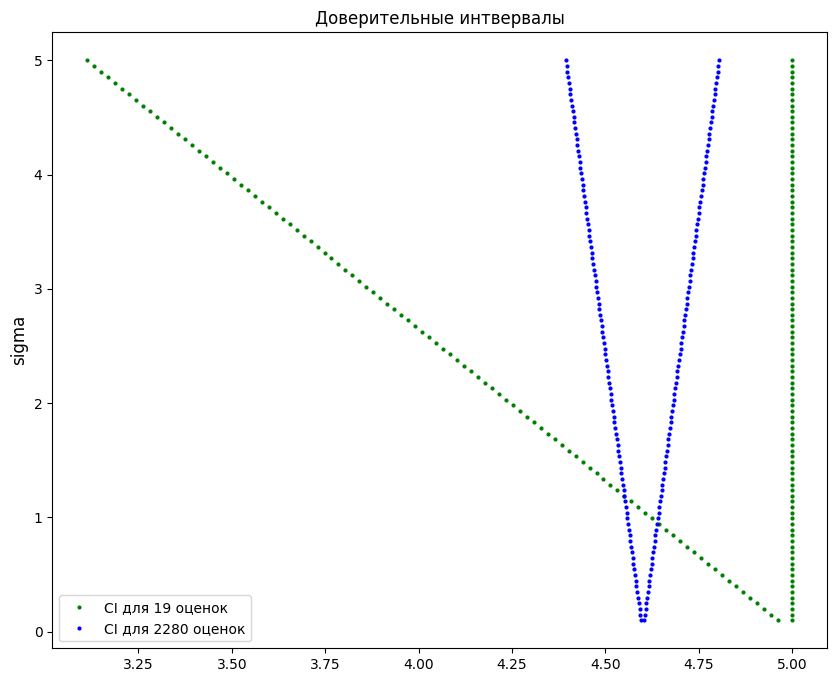

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.plot(CI_1[:, 0], sigma_array, 'o', color='green', markersize=2, label = 'CI для 19 оценок')
axs.plot(CI_1[:, 1], sigma_array, 'o', color='green', markersize=2)
axs.plot(CI_2[:, 0], sigma_array, 'o', color='blue', markersize=2, label = 'CI для 2280 оценок')
axs.plot(CI_2[:, 1], sigma_array, 'o', color='blue', markersize=2)


axs.set_ylabel('sigma', fontsize=12)
axs.set_title('Доверительные интвервалы', fontsize=12)
axs.legend()

plt.show()

Отсюда мы видим, что при достаточно больших значениях дисперсии, левый конец доверительного интервала для 19 оценок, лежит левее левого конца доверительного интервала для большого количества оценок, а значит risk-averse люди будут склонны не рисковать и будут предпочитать товар с большим количеством отзывов, пусть даже с меньшим средним значением. Конечно, здесь можно построить модель того, как люди выбирают товары, но без данных здесь сложно.

Стоит отменить, что картинка будет выглядеть так же и выводы будут такими же и для других значений $n_1, n_2, \alpha$. 